# Bike Sharing Assignment

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

> Which variables are significant in predicting the demand for shared bikes.

> How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 0: Importing packages/libraries

In [1]:
# ignore warnings...

import warnings
warnings.filterwarnings('ignore')

In [2]:
# imorting necessary library for coursework...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Step 1: Reading and Understanding the Data

In [3]:
# reading data from csv file...
dataf = pd.read_csv('day.csv')

In [4]:
# describing columns

dataf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Check the head of the dataset
 
dataf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# checking the shape of dataframe

dataf.shape

(730, 16)

In [7]:
# getting information about columns

dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking for null values

dataf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# renaming columns for readibility

dataf.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
# verifying head of the dataset as columns are renamed

dataf.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Copying dataframe

dataf_copy = dataf.copy()

In [12]:
# checking shape of new dataframe

dataf_copy.shape

(730, 16)

In [13]:
# dropping the duplicates

dataf_copy.drop_duplicates(inplace=True)

In [14]:
# reverifying dataframe

dataf_copy.shape

(730, 16)

#### Shape is same after dropping duplicates, which means that there are no any duplicates in the original dataframe as well.

In [15]:
# droppingb columns (unwanted)
# instant has only index, dteday has dates which can be replaced by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

dataf.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
# mapping season column

dataf.season = dataf.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [17]:
# mapping month column

dataf.month = dataf.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [18]:
# mapping weekday column

dataf.weekday = dataf.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [19]:
# mapping weathersit column

dataf.weathersit = dataf.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [20]:
# verifying head of the dataset
dataf.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# check column info of dataset

dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

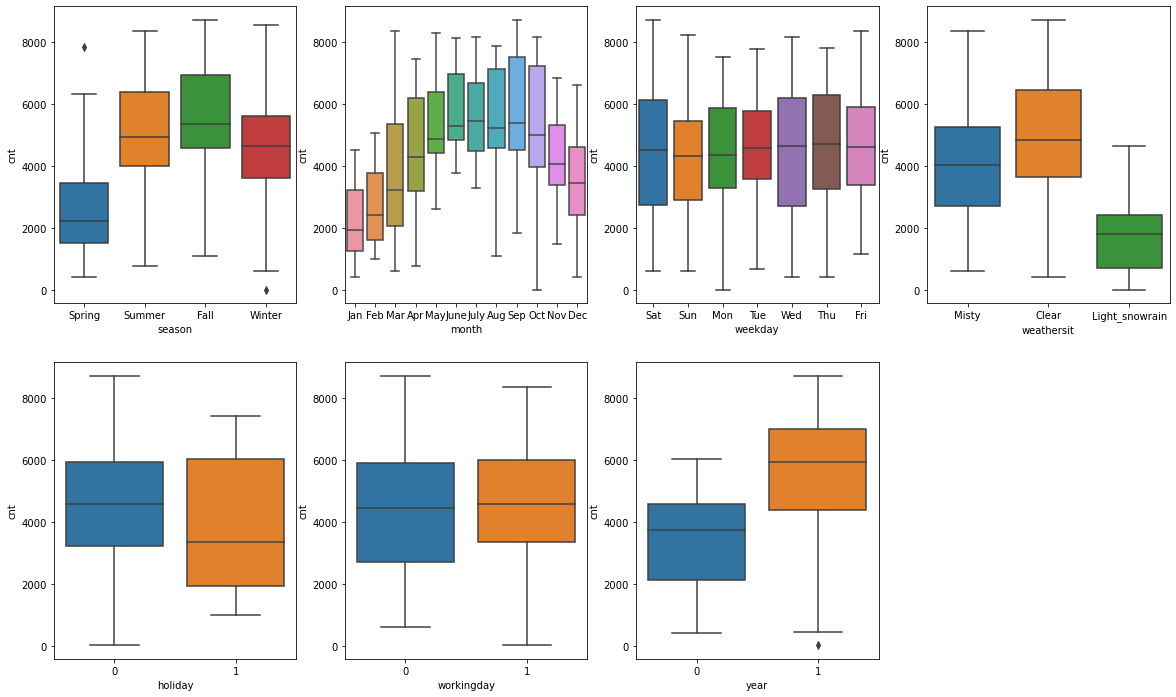

In [22]:
# Analysing categorical columns
# to check how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataf)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = dataf)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataf)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataf)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = dataf)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataf)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = dataf)
plt.show()

In [23]:
# defining function to create barplot which is related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=dataf)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=dataf, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

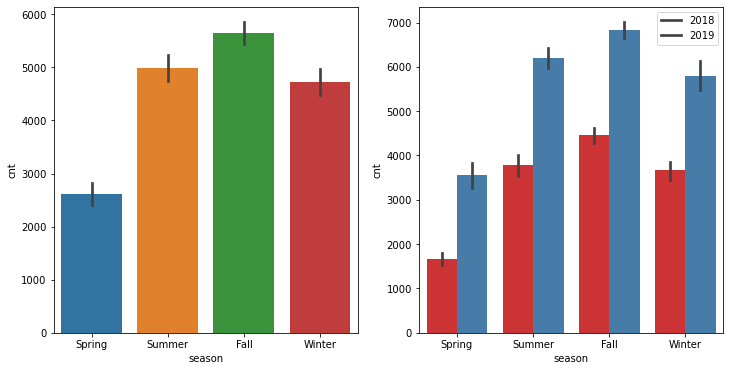

In [24]:
# visualization for season column

plot_cat_columns('season')

Fall season has attracted more booking. And, in each season booking count has increased drastically from 2018 to 2019.

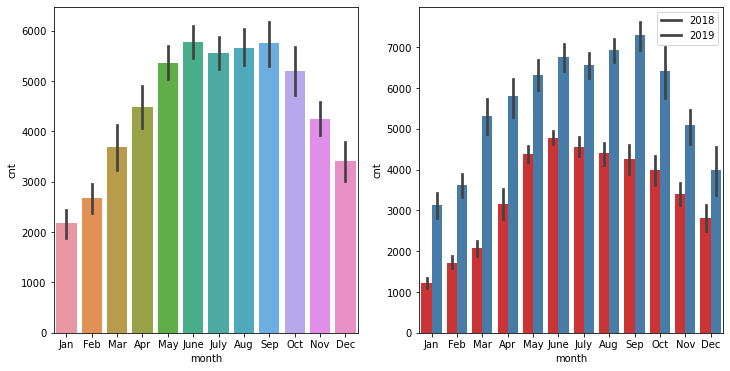

In [25]:
# plotting visualization for comun (month)

plot_cat_columns('month')

Most of the bookings are month of may, june, july, aug, sep and oct. Trend has increased from starting of the year till mid of the year and after that it started decreasing as approached the end of year.
Number of booking for each month seems to get increased from 2018 to 2019.

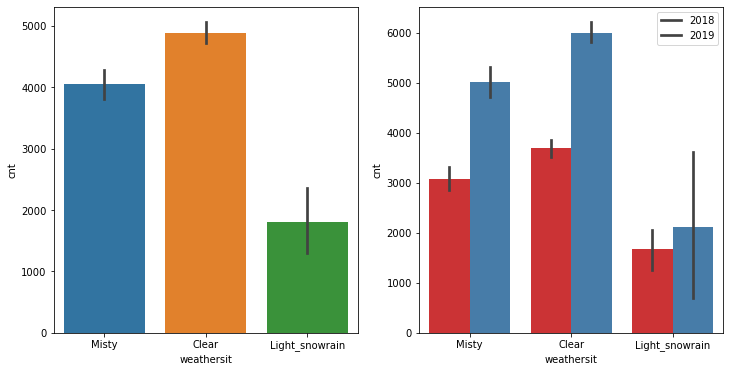

In [26]:
# plotting visualization for column (weathersit)

plot_cat_columns('weathersit')

Clear weather seems to attract more booking which is also obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

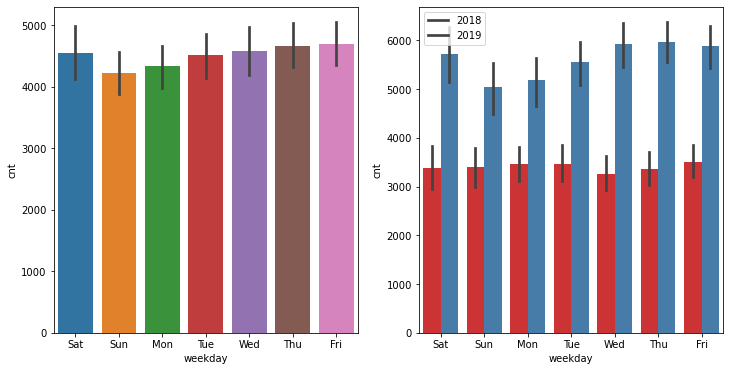

In [27]:
# plotting visualization for column (weekday)

plot_cat_columns('weekday')

Thu, Fir, Sat and Sun is having more number of booking comparing to others.

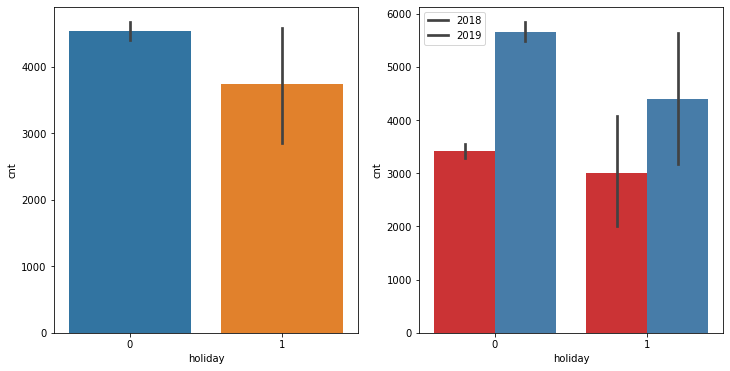

In [28]:
# plotting visualization for column (holiday)

plot_cat_columns('holiday')

On holiday bookings seems to be get decreased as people want to spend time with their family.

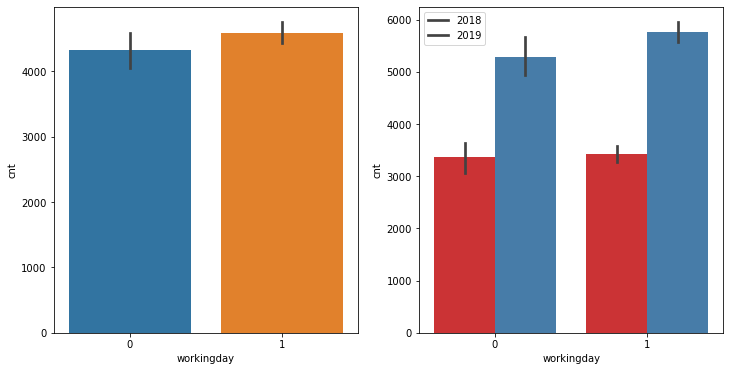

In [29]:
# plotting visualization for column (workingday)

plot_cat_columns('workingday')

cnt is increased from last year whereas booking seems equal for both working and non-wokring day.

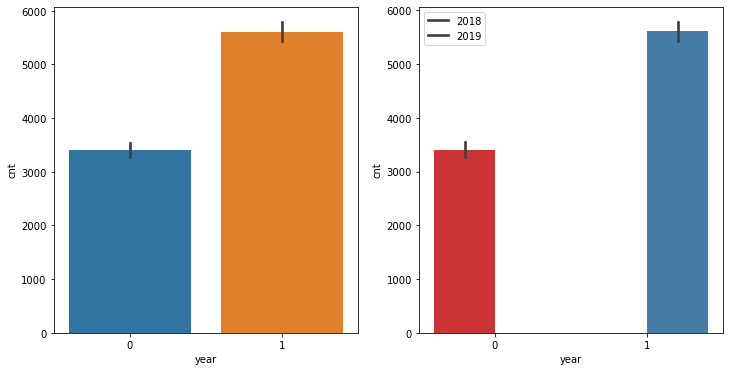

In [30]:
# plotting visualization for column (year)

plot_cat_columns('year')

In 2019, more booking were done comparison to last year, which is good for business.

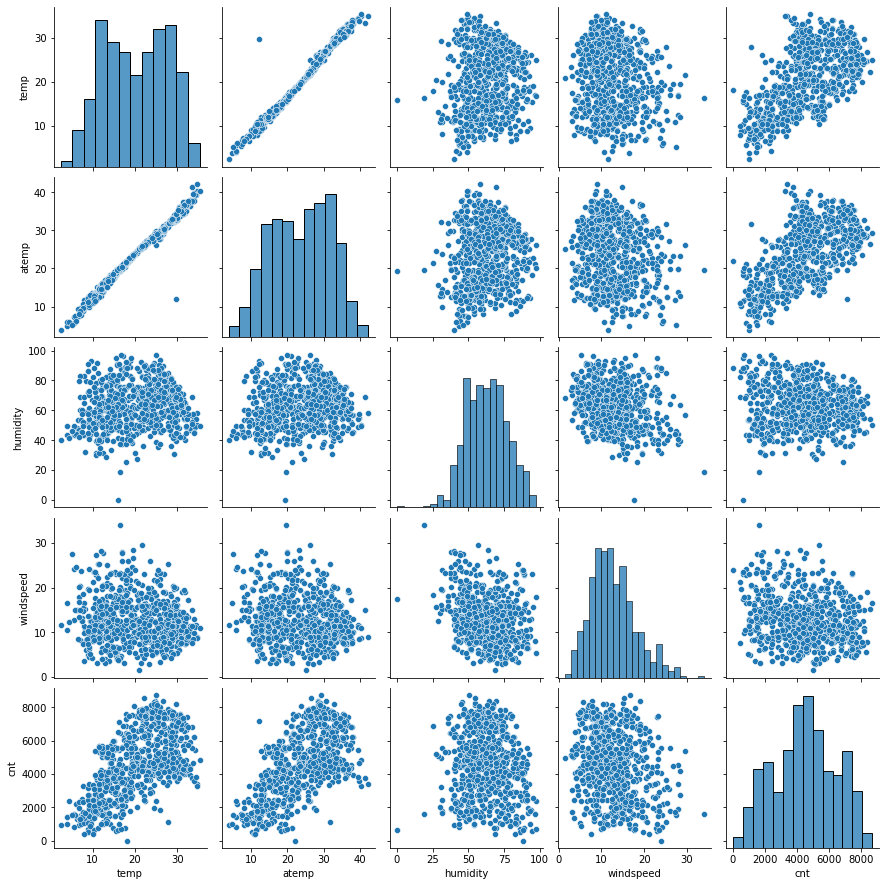

In [31]:
# Analysing numerical columns

sns.pairplot(data=dataf,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

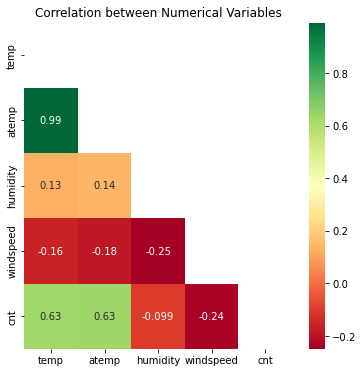

In [32]:
# Checking the correlation between numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(dataf[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(dataf[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### It is showing linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 3: Data Preparation

In [33]:
# creating dummy variables for month, weekday, weathersit and season variables.

months_dataf=pd.get_dummies(dataf.month,drop_first=True)
weekdays_dataf=pd.get_dummies(dataf.weekday,drop_first=True)
weathersit_dataf=pd.get_dummies(dataf.weathersit,drop_first=True)
seasons_dataf=pd.get_dummies(dataf.season,drop_first=True)

In [34]:
# reverifying head of the dataset
dataf.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
# merging  the dataframe, with  dummy variable dataset. 

dataf_new = pd.concat([dataf,months_dataf,weekdays_dataf,weathersit_dataf,seasons_dataf],axis=1)

In [36]:
# verifying new head of the dataset

dataf_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [37]:
dataf_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Aug             730 non-null    uint8  
 13  Dec             730 non-null    uint8  
 14  Feb             730 non-null    uint8  
 15  Jan             730 non-null    uint8  
 16  July            730 non-null    uint8  
 17  June            730 non-null    uin

In [38]:
# dropping unnecessary columns
dataf_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [39]:
# verifying head of new dataframe

dataf_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [40]:
# checking shape of new dataframe

dataf_new.shape

(730, 30)

In [41]:
# checking column info of new dataframe 

dataf_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Aug             730 non-null    uint8  
 9   Dec             730 non-null    uint8  
 10  Feb             730 non-null    uint8  
 11  Jan             730 non-null    uint8  
 12  July            730 non-null    uint8  
 13  June            730 non-null    uint8  
 14  Mar             730 non-null    uint8  
 15  May             730 non-null    uint8  
 16  Nov             730 non-null    uint8  
 17  Oct             730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets

In [42]:
# splitting dataframe into Train and Test

np.random.seed(0)
dataf_train, dataf_test = train_test_split(dataf_new, train_size = 0.7, random_state = 100)

In [43]:
# checking shape of training datatset

dataf_train.shape

(510, 30)

In [44]:
# checking shape of testing datatset

dataf_test.shape

(220, 30)

In [45]:
# using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [46]:
# verifying head of dataset before scaling.

dataf_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [47]:
# apply scaler() to all columns except 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
dataf_train[num_vars] = scaler.fit_transform(dataf_train[num_vars])

In [48]:
# verifying the head after appying scaling.

dataf_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [49]:
# describing dataset

dataf_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


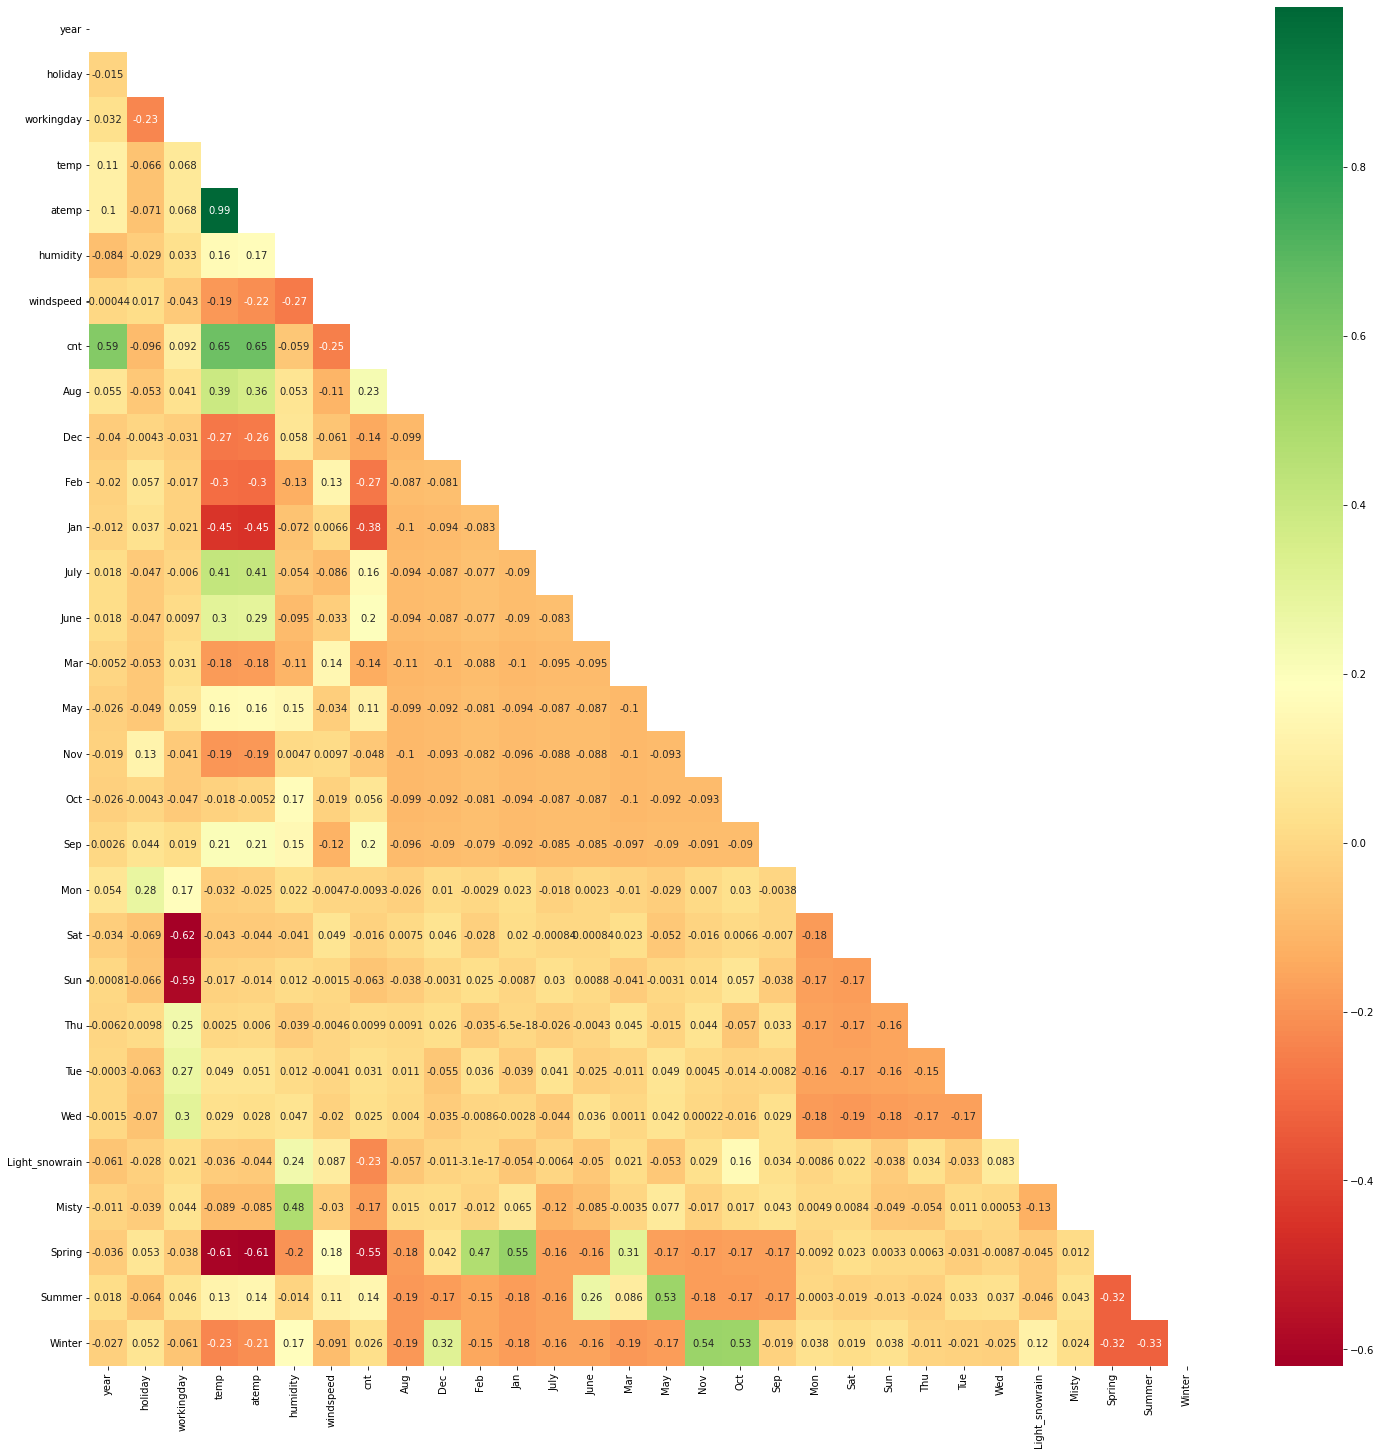

In [50]:
# checking correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(dataf_train.corr())
sns.heatmap(dataf_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### cnt seems to have correlation with year and temp where misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

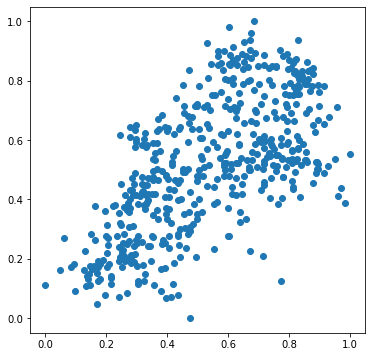

In [51]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(dataf_train.temp, dataf_train.cnt)
plt.show()

It confirms the positive correlation between temp and cnt.

In [52]:
# Building Linear Model

y_train = dataf_train.pop('cnt')
X_train = dataf_train

In [53]:
# elementing recursive feature 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [54]:
#Listing variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 11),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 7),
 ('Wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 15),
 ('Winter', True, 1)]

In [55]:
# selecting all the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'July', 'Sep', 'Sat', 'Sun', 'Light_snowrain', 'Misty',
       'Spring', 'Winter'],
      dtype='object')


In [56]:
# checking that which columns has been rejected

X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed', 'Summer'],
      dtype='object')

In [57]:
# Generic function to calculate the VIF of variables

def calculateVIF(dataf):
    vif = pd.DataFrame()
    vif['Features'] = dataf.columns
    vif['VIF'] = [variance_inflation_factor(dataf.values, i) for i in range(dataf.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [58]:
# dataframe with the RFE selected variables

X_train_rfe = X_train[col]

In [59]:
# calculate the VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
9,Sat,9.96
10,Sun,9.67
13,Spring,2.55
1,holiday,2.54
5,humidity,1.90
14,Winter,1.79
12,Misty,1.57


humidity is showing high VIF value.

## Step 5: Building a linear model

In [60]:
# Building the 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 17 May 2022   Prob (F-statistic):          8.89e-189
Time:                        00:54:44   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2422      0.025      9.

In [61]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,52.82
4,atemp,51.26
2,workingday,23.75
8,Sat,6.21
9,Sun,5.79
12,Spring,2.53
1,holiday,1.88
13,Winter,1.73
6,July,1.28
5,windspeed,1.12


VIF values seems alright now. But we will check whether we can reduce further ?

In [62]:
# Building the 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.51e-186
Time:                        00:54:44   Log-Likelihood:                 503.28
No. Observations:                 510   AIC:                            -978.6
Df Residuals:                     496   BIC:                            -919.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1778      0.020      9.

VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [63]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.51e-186
Time:                        00:54:44   Log-Likelihood:                 503.28
No. Observations:                 510   AIC:                            -978.6
Df Residuals:                     496   BIC:                            -919.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1778      0.020      9.

In [64]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.51e-186
Time:                        00:54:44   Log-Likelihood:                 503.28
No. Observations:                 510   AIC:                            -978.6
Df Residuals:                     496   BIC:                            -919.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1778      0.020      9.

In [65]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.51e-186
Time:                        00:54:44   Log-Likelihood:                 503.28
No. Observations:                 510   AIC:                            -978.6
Df Residuals:                     496   BIC:                            -919.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1778      0.020      9.

In [66]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['July'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,52.37
4,atemp,51.25
2,workingday,23.19
7,Sat,6.10
8,Sun,5.70
11,Spring,2.52
1,holiday,1.86
12,Winter,1.73
5,windspeed,1.12
6,Sep,1.07


VIF value now seems to be good as it came below 5.

In [67]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 17 May 2022   Prob (F-statistic):          4.00e-184
Time:                        00:54:44   Log-Likelihood:                 494.75
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     497   BIC:                            -908.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1895      0.020      9.

#### We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

In [68]:
# Checking parameters and their coefficient values
lr_6.params

const             0.189527
year              0.235701
holiday          -0.019539
workingday        0.082093
temp              0.315751
atemp             0.097863
windspeed        -0.132744
Sep               0.067972
Sat               0.092338
Sun               0.034635
Light_snowrain   -0.291857
Misty            -0.079194
Spring           -0.116910
Winter            0.046668
dtype: float64

## Step 6: Residual Analysis of the train data and validation


In [69]:
X_train_lm_6

,const,year,holiday,workingday,temp,atemp,windspeed,Sep,Sat,Sun,Light_snowrain,Misty,Spring,Winter
576,1.0,1,0,1,0.815169,0.766351,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.255342,0,1,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.200348,0.663106,0,0,1,0,0,1,0
482,1.0,1,0,0,0.395666,0.391735,0.188475,0,1,0,0,1,0,0
111,1.0,0,0,1,0.345824,0.318819,0.380981,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.824359,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.218747,0.111379,0,0,0,0,0,1,0
350,1.0,0,0,0,0.248216,0.223544,0.431816,0,1,0,0,1,0,1
79,1.0,0,0,1,0.462664,0.434043,0.529881,0,0,0,0,1,0,0


In [70]:
y_train_pred = lr_6.predict(X_train_lm_6)

#### Normality of error terms

Text(0.5, 0, 'Errors')

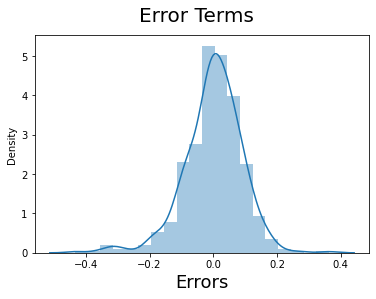

In [71]:
# Plotting histogram of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are in normal terms

#### Multi Colinearity

In [72]:
calculateVIF(X_train_new)

,Features,VIF
3,temp,52.37
4,atemp,51.25
2,workingday,23.19
7,Sat,6.10
8,Sun,5.70
11,Spring,2.52
1,holiday,1.86
12,Winter,1.73
5,windspeed,1.12
6,Sep,1.07


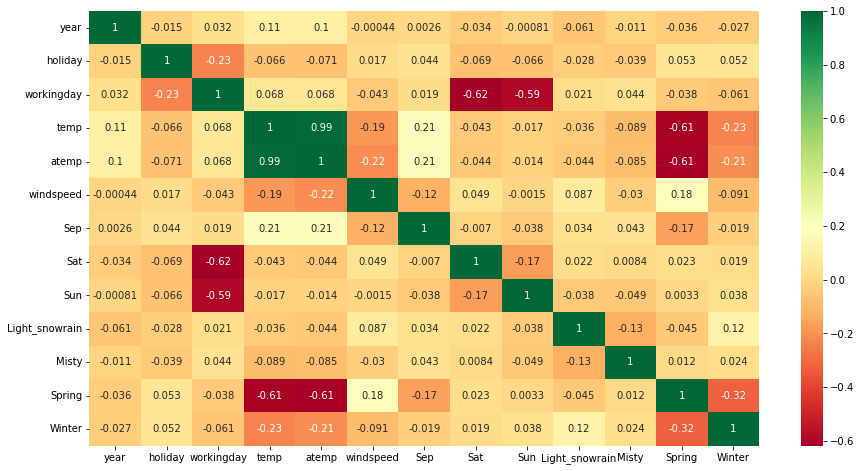

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values seems less than 5 which is good and also there is no multicolinearity seen from the heatmap.

#### Linearity 

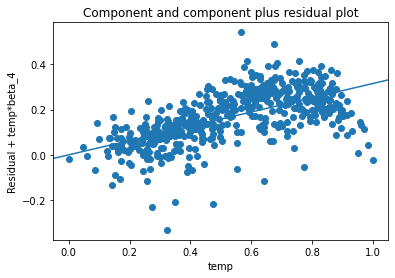

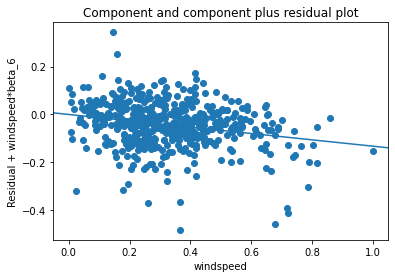

In [74]:
sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be seens from visulaization

#### Homoscedasticity

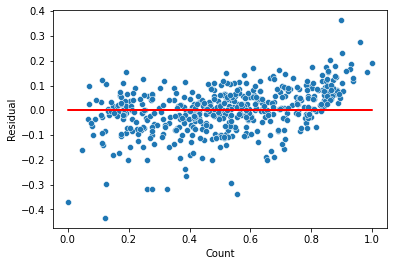

In [75]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible patterns are seen

#### Independence of residuals

Durbin-Watson value of final model lr_6 is 2.085, which shows no autocorrelation.

## Step 7: Making Predictions Using the Final Model

Now that we have completely fitted model and even had checked the normality of error terms, it's time to go make predictions using the final, i.e. 6th model.

In [76]:
# Applying scaling
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
dataf_test[num_vars] = scaler.transform(dataf_test[num_vars])
dataf_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [77]:
dataf_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
y_test = dataf_test.pop('cnt')
X_test = dataf_test

In [79]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [80]:
y_pred = lr_6.predict(X_test_lm_6)

In [81]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8084

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

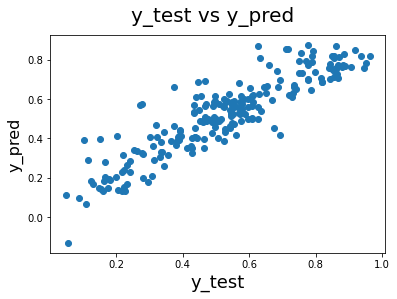

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [83]:
round(lr_6.params,4)

const             0.1895
year              0.2357
holiday          -0.0195
workingday        0.0821
temp              0.3158
atemp             0.0979
windspeed        -0.1327
Sep               0.0680
Sat               0.0923
Sun               0.0346
Light_snowrain   -0.2919
Misty            -0.0792
Spring           -0.1169
Winter            0.0467
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.1909 + 0.2341  \times  year - 0.0963  \times  holiday + 0.4777 \times temp - 0.1481 \times windspeed + 0.0910 \times sep - 0.2850 \times Light_snowrain - 0.0787 \times Misty - 0.0554 \times spring + 0.0621 \times summer + 0.0945 \times winter $

In [84]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7963


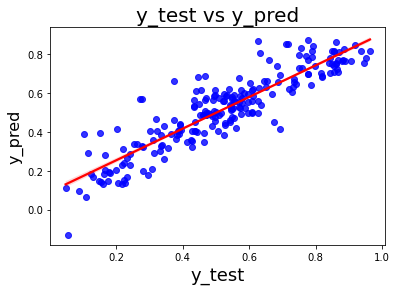

In [85]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# This is comparison between Training dataset and Testing dataset and Accuracy of the model.

    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7944

# CONCLUSION

#### Company can find out the demand of bikes are depending on year, holiday, temp, windspeed, Sep, Light_snowrain, Misty, spring, summer and winter.